<a href="https://colab.research.google.com/github/MarziehHashemzadehSaadat/final-project/blob/main/INSE6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass Classification with PyCaret

**Install** **Pycaret**

In [4]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In [8]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/MarziehHashemzadehSaadat/final-project/main/Book1.csv')
df.head(25)

A          B         C         D         E          F          G  \
0   115.148438  51.383377  0.082812 -0.569281  1.648829  11.334623  12.673800   
1   104.500000  46.781407  0.610511  0.665677  1.959030  13.704325  10.428528   
2   135.078125  48.686595  0.113358 -0.147732  2.354515  17.243720   9.291449   
3   125.679688  48.037897  0.014871 -0.043867  5.914716  27.298353   5.190414   
4   119.195312  51.928144  0.047141 -0.686541  9.627926  38.893146   4.072053   
5   116.625000  52.407657  0.119323 -0.147561  3.747492  20.400828   6.610455   
6   128.820312  42.981179 -0.251582  0.430921  2.424749  14.262067   9.224601   
7    98.390625  38.090606  0.181847  1.328353  2.646321  15.262458   8.322597   
8   109.343750  32.771567  0.275442  2.679993  3.254181  21.394736   7.802423   
9   122.421875  42.550083  0.196809  0.272008  2.216555  13.980125   9.518078   
10   94.210938  37.199557  0.473575  1.919947  2.740803  21.107815   8.834994   
11  128.695312  61.484825 -0.021452 -0.645660  0.893813  11.439294  15.335643   
12  110.304688  40.893451  0.062789  0.462445  4.395485  23.004361   6.869968   
13  101.195312  40.438622  0.436344  1.043268  2.738294  18.785693   8.464980   
14   78.578125  35.773945  0.890442  3.463752  1.952341  13.993915  10.253332   
15  131.828125  56.345628 -0.036378 -0.522554  4.956522  26.149713   5.711101   
16  133.312500  59.118888 -0.085394 -0.749533  2.529264  21.703690   8.942403   
17  131.273438  50.455382  0.024921  0.195920  1.496656  15.696244  11.971549   
18  117.242188  44.905760  0.187123  0.250451  1.759197  12.032379  12.143039   
19  112.367188  52.949397  0.087103 -0.160979  4.627926  21.416350   5.797639   
20  110.101562  48.708771  0.518679  0.343425  1.065217  12.334283  14.141409   
21  121.007812  36.526638  0.147047  1.174059  2.890468  19.474764   8.198444   
22  135.468750  47.366909  0.111351 -0.055069  4.212375  25.058461   6.854450   
23  104.578125  54.358850  0.252296 -0.319442  3.532609  18.517363   7.170143   
24  110.945312  41.324045  0.236397  0.678847  1.498328  13.391925  11.797374   

             H  class  
0   229.543029      0  
1   139.671367      0  
2   100.291910      0  
3    29.334389      0  
4    15.598908      0  
5    49.708670      0  
6   114.010028      0  
7    90.983960      0  
8    65.061099      0  
9   120.517992      0  
10   80.835277      0  
11  269.573002      0  
12   53.538433      0  
13   82.994641      0  
14  132.544789      0  
15   34.028721      0  
16   81.852690      0  
17  156.126088      0  
18  198.909211      0  
19   40.055821      0  
20  230.387192      0  
21   76.728799      0  
22   49.369713      0  
23   63.898811      0  
24  165.370702      0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       110 non-null    float64
 1   B       110 non-null    float64
 2   C       110 non-null    float64
 3   D       110 non-null    float64
 4   E       110 non-null    float64
 5   F       110 non-null    float64
 6   G       110 non-null    float64
 7   H       110 non-null    float64
 8   class   110 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 7.9 KB


In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [11]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data** **Analysis** **bold text**

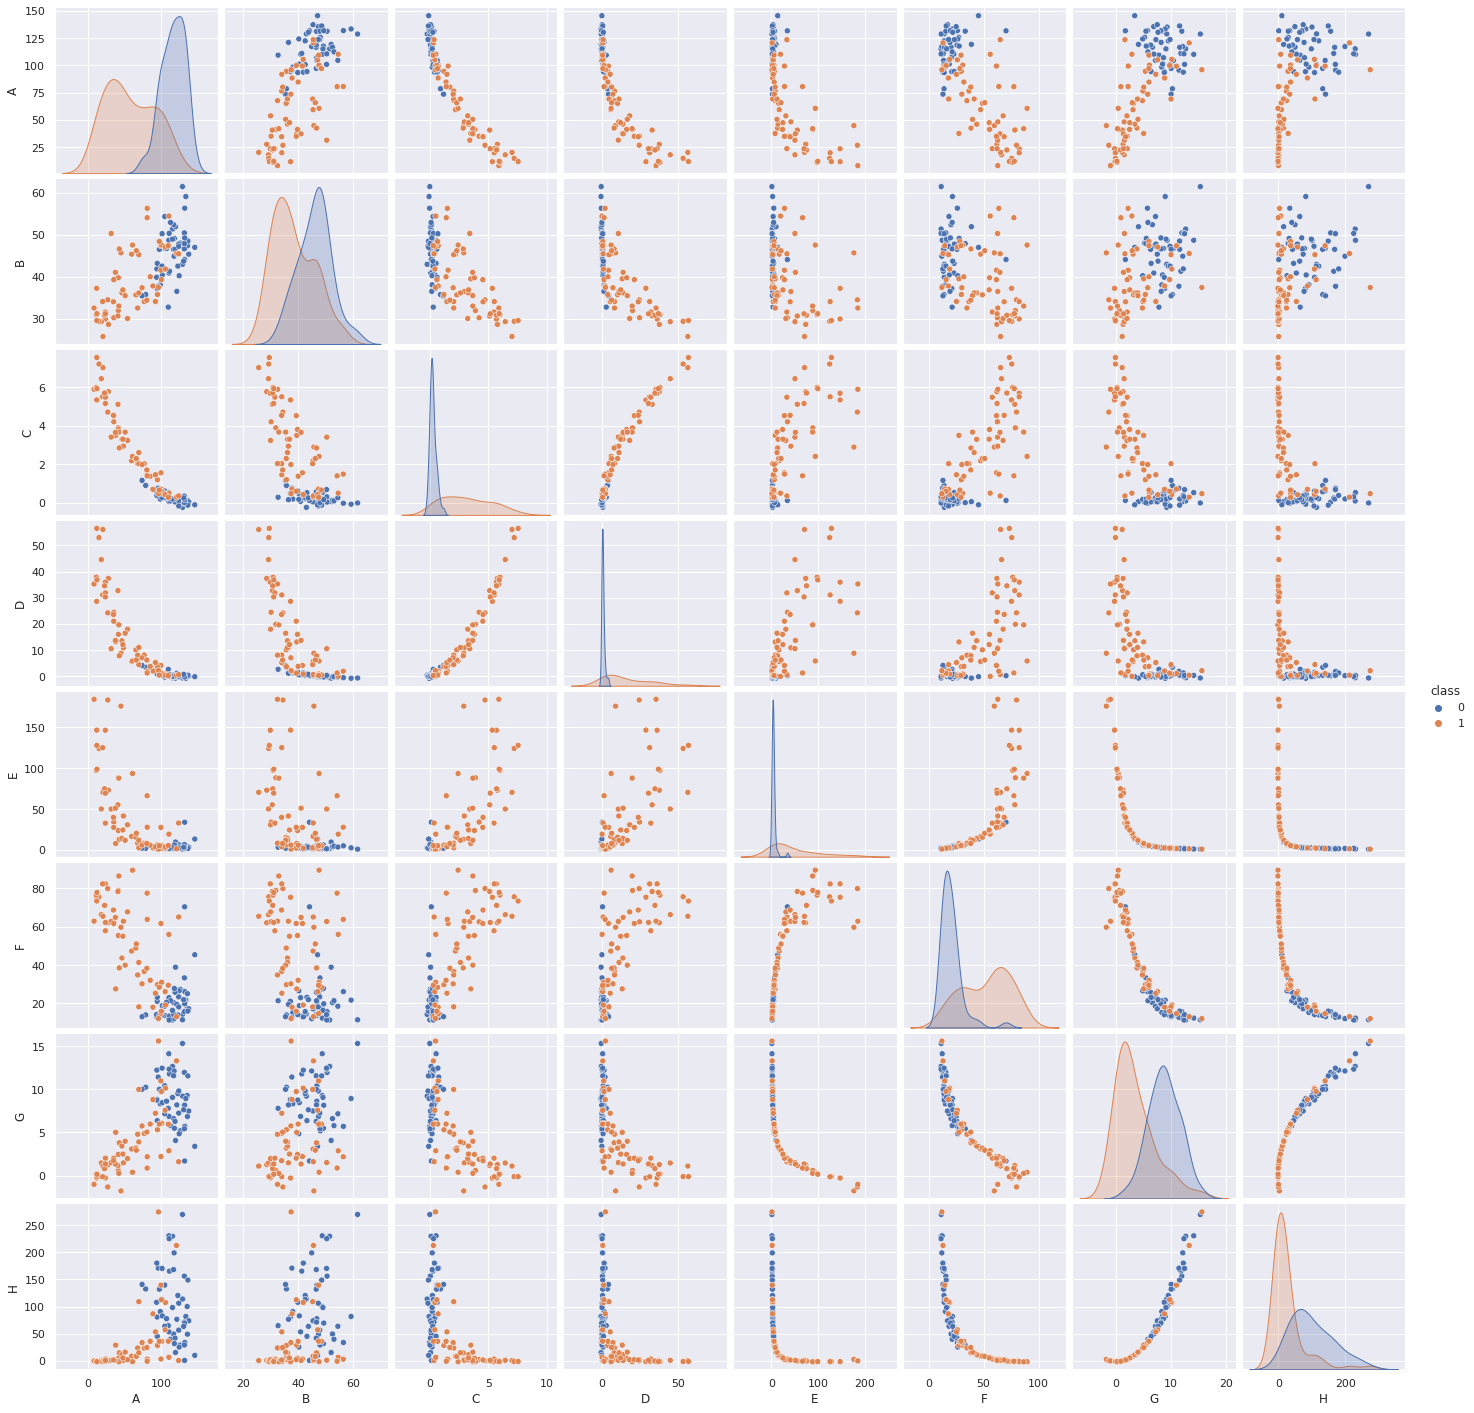

In [12]:
sns.pairplot(df, hue='class')
plt.show()

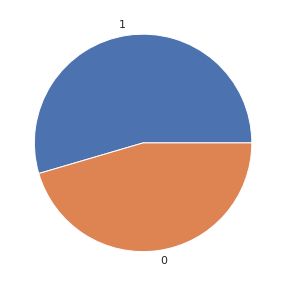

In [13]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [14]:
X = df.drop(columns=['class'])
X.head(10)

A          B         C         D         E          F          G  \
0  115.148438  51.383377  0.082812 -0.569281  1.648829  11.334623  12.673800   
1  104.500000  46.781407  0.610511  0.665677  1.959030  13.704325  10.428528   
2  135.078125  48.686595  0.113358 -0.147732  2.354515  17.243720   9.291449   
3  125.679688  48.037897  0.014871 -0.043867  5.914716  27.298353   5.190414   
4  119.195312  51.928144  0.047141 -0.686541  9.627926  38.893146   4.072053   
5  116.625000  52.407657  0.119323 -0.147561  3.747492  20.400828   6.610455   
6  128.820312  42.981179 -0.251582  0.430921  2.424749  14.262067   9.224601   
7   98.390625  38.090606  0.181847  1.328353  2.646321  15.262458   8.322597   
8  109.343750  32.771567  0.275442  2.679993  3.254181  21.394736   7.802423   
9  122.421875  42.550083  0.196809  0.272008  2.216555  13.980125   9.518078   

            H  
0  229.543029  
1  139.671367  
2  100.291910  
3   29.334389  
4   15.598908  
5   49.708670  
6  114.010028  
7   90.983960  
8   65.061099  
9  120.517992

In [15]:
X.describe().transpose()

count       mean        std        min        25%        50%         75%  \
A  110.0  83.993040  39.202077   8.226562  46.500000  95.808594  116.605469   
B  110.0  41.798315   7.751395  25.771711  35.716165  41.862420   47.411737   
C  110.0   1.809851   2.109912  -0.251582   0.185443   0.629868    3.278911   
D  110.0   8.954072  13.767989  -0.749533   0.302962   1.423450   11.855382   
E  110.0  27.152075  43.151868   0.893813   2.484741   5.533445   32.253972   
F  110.0  37.814244  23.676102  11.313063  17.439778  27.688100   61.982419   
G  110.0   5.823737   4.230623  -1.785377   1.983455   5.778119    9.043148   
H  110.0  60.171909  68.477697  -1.504341   2.664328  35.088348   99.813484   

          max  
A  145.437500  
B   61.484825  
C    7.550922  
D   56.537747  
E  184.525920  
F   89.542258  
G   15.619247  
H  274.319081

**Standardize the Data**

In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

A         B         C         D         E         F         G  \
0  0.798376  1.242219 -0.822282 -0.694868 -0.593716 -1.123530  1.626572   
1  0.525503  0.645806 -0.571033 -0.604760 -0.586495 -1.022984  1.093424   
2  1.309086  0.892717 -0.807739 -0.664110 -0.577288 -0.872807  0.823421   
3  1.068245  0.808647 -0.854631 -0.656532 -0.494406 -0.446189 -0.150385   
4  0.902079  1.312820 -0.839266 -0.703424 -0.407963  0.045778 -0.415944   
5  0.836213  1.374965 -0.804899 -0.664098 -0.544859 -0.738851  0.186809   
6  1.148726  0.153299 -0.981495 -0.621889 -0.575653 -0.999319  0.807547   
7  0.368947 -0.480517 -0.775130 -0.556408 -0.570495 -0.956872  0.593363   
8  0.649627 -1.169862 -0.730567 -0.457786 -0.556344 -0.696680  0.469846   
9  0.984762  0.097429 -0.768006 -0.633484 -0.580500 -1.011281  0.877235   

          H  
0  2.484696  
1  1.166267  
2  0.588566  
3 -0.452390  
4 -0.653892  
5 -0.153497  
6  0.789812  
7  0.452017  
8  0.071725  
9  0.885285

In [17]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
A  110.0 -2.018587e-18  1.004577 -1.941561 -0.960782  0.302781  0.835713   
B  110.0  8.256022e-16  1.004577 -2.077039 -0.788243  0.008308  0.727497   
C  110.0  1.715799e-17  1.004577 -0.981495 -0.773417 -0.561817  0.699452   
D  110.0 -7.065056e-18  1.004577 -0.708020 -0.631225 -0.549469  0.211693   
E  110.0  6.863197e-17  1.004577 -0.611293 -0.574256 -0.503282  0.118772   
F  110.0 -2.134656e-16  1.004577 -1.124445 -0.864488 -0.429652  1.025455   
G  110.0 -2.241263e-16  1.004577 -1.806811 -0.911889 -0.010832  0.764461   
H  110.0 -1.347407e-16  1.004577 -0.904799 -0.843644 -0.367979  0.581547   

        max  
A  1.574551  
B  2.551361  
C  2.733453  
D  3.471927  
E  3.663667  
F  2.194819  
G  2.325979  
H  3.141567

**Observations and variables**

In [18]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

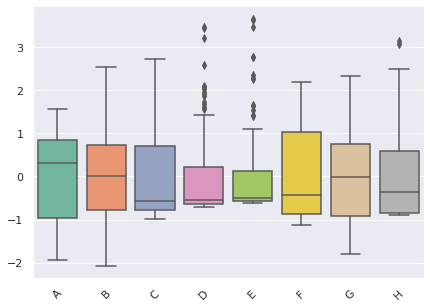

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

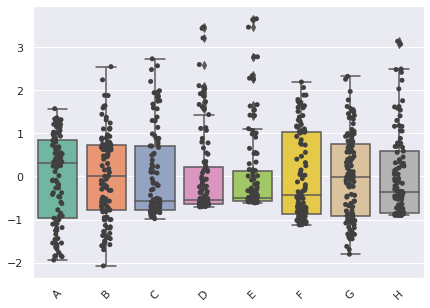

In [20]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

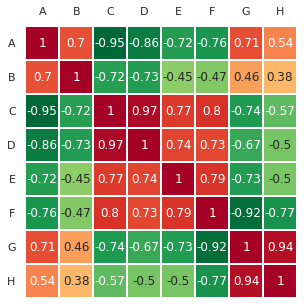

In [21]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

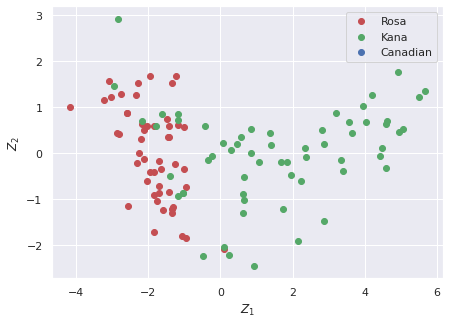

In [22]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

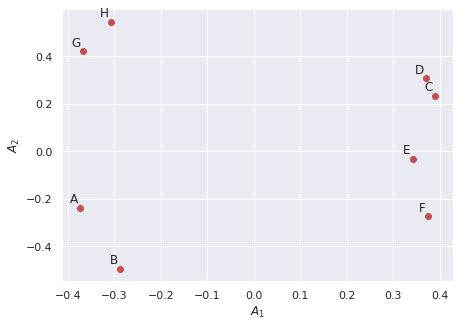

In [23]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


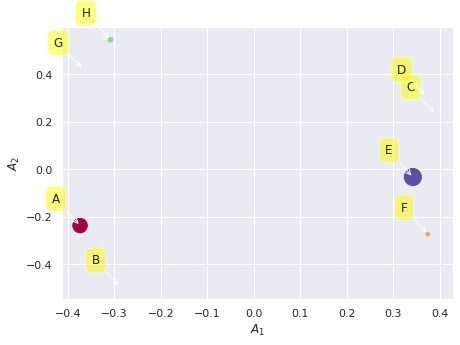

In [24]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

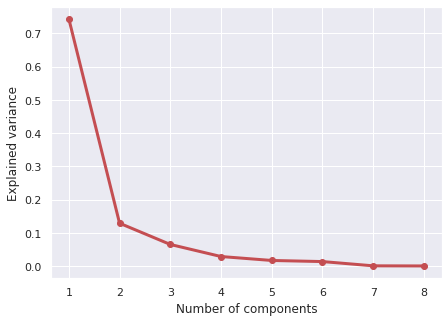

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

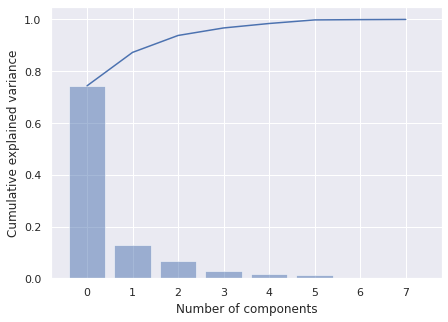

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

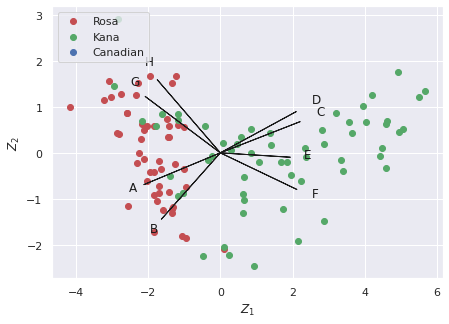

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

**Using PCA Library**

In [28]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=90c7d82e350d16b2d971c39c9d6b5af37610113e5ca8170e1a9738c899872efe
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=5594e1188d0f330a17a2aef9473e4062f95b1d4efcccbdb9297f72d3157633ef
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3       PC4
0   -3.222662  1.156408  1.340525 -0.261675
1   -2.174740  0.631474  0.392057 -0.179750
2   -2.316515 -0.219685  0.209904  0.108088
3   -1.350826 -1.226238 -0.299167  0.133521
4   -1.071953 -1.806032  0.005877 -0.140377
..        ...       ...       ...       ...
105  4.582529  0.621618  0.351367 -0.093520
106  0.299298  0.070438 -1.114371  0.269513
107  2.880756  0.185812 -0.458549 -0.446130
108  0.938768 -2.455451  1.158747 -0.120909
109 -1.184203 -0.940799 -0.241564 -0.058021

[110 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19398fc6a0>)

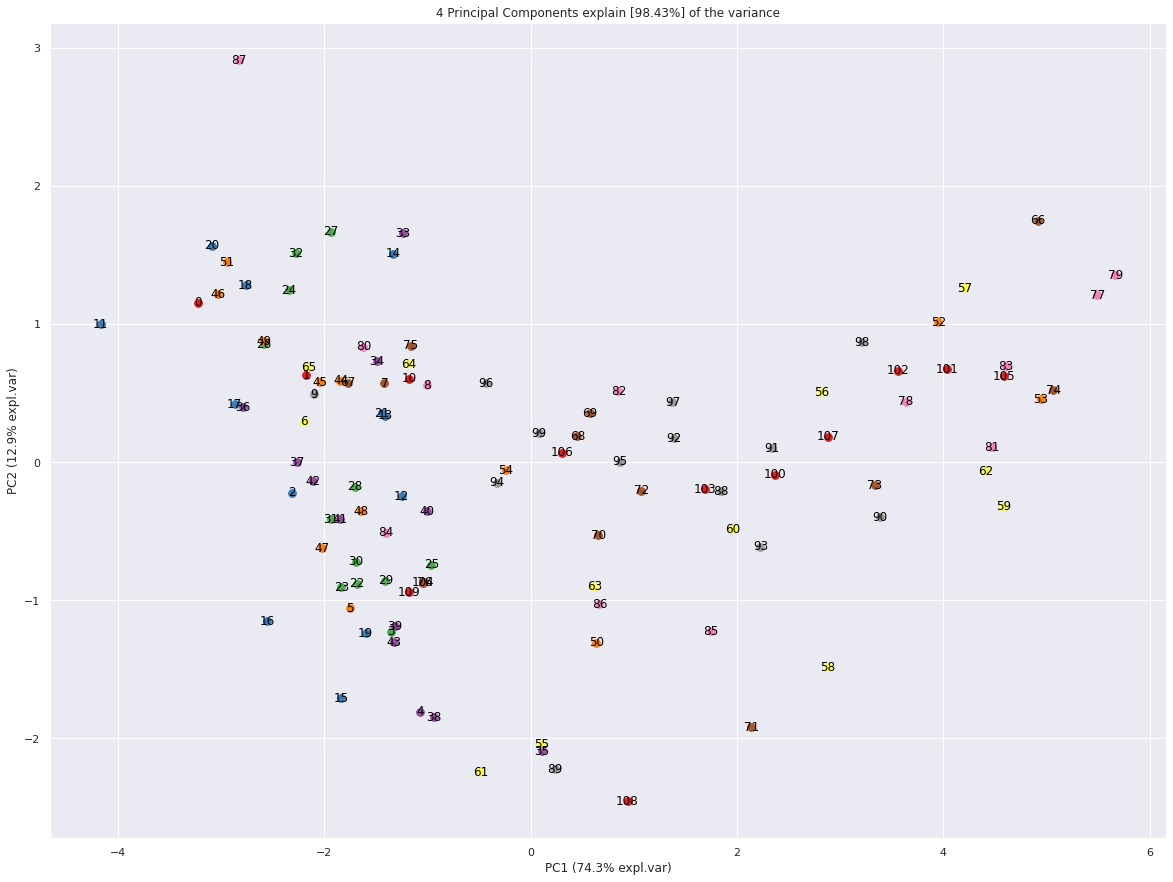

In [31]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [32]:
A = out['loadings'].T

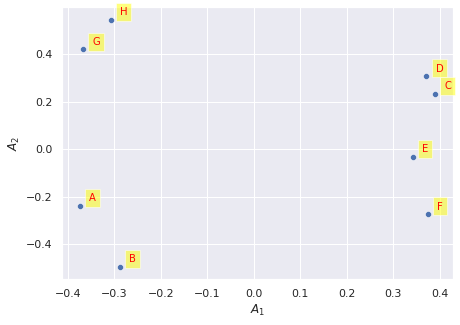

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

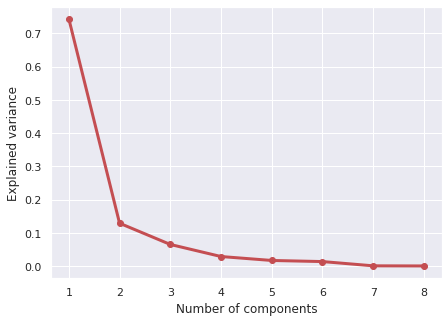

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

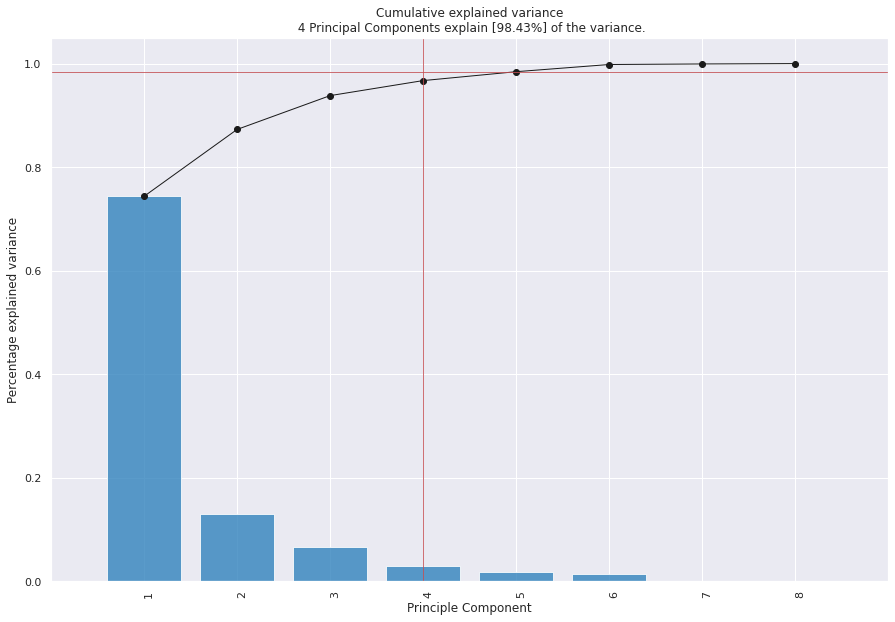

<Figure size 504x360 with 0 Axes>

In [35]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].


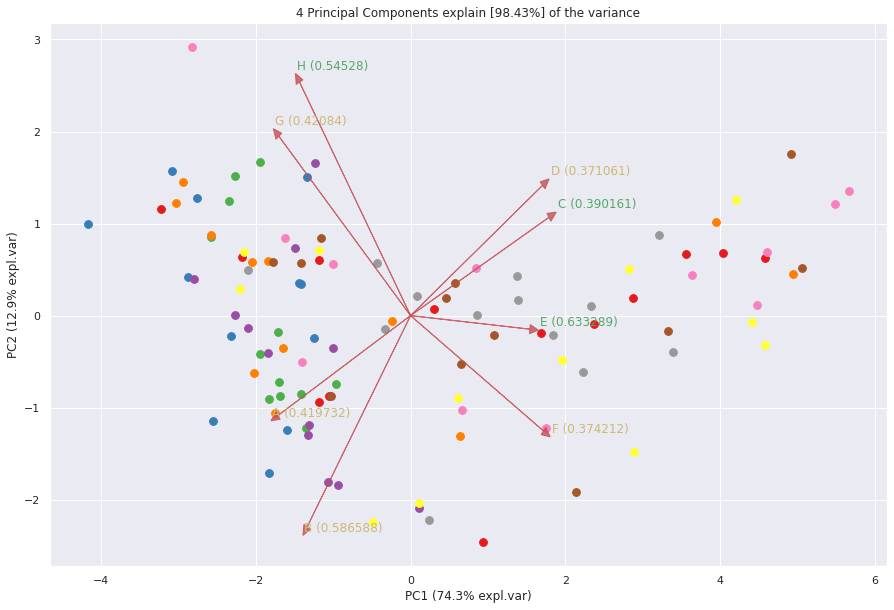

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1941b515b0>)

In [36]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].


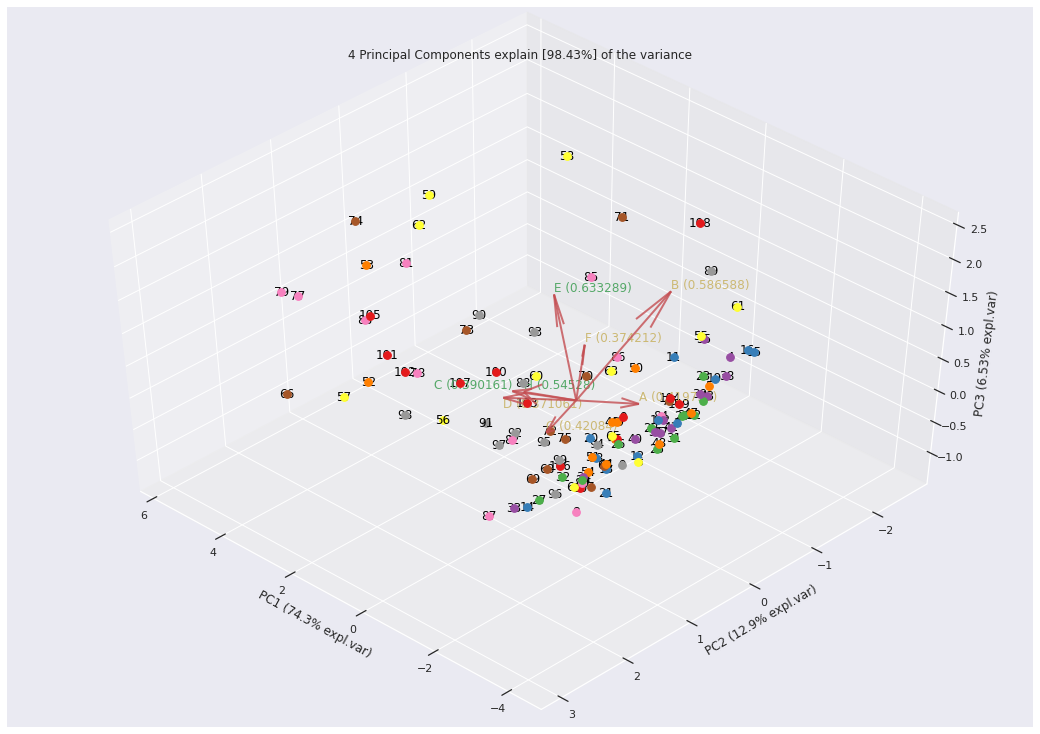

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f193c16f370>)

In [37]:
model.biplot3d(legend=False)

# **Classification**

Using PyCaret

In [38]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (99, 9)
Unseen Data For Predictions: (11, 9)


**Setting up the Environment in PyCaret**



In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.6
INFO:logs:Initializing setup()
INFO:logs:setup(target=class, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_fe

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .            22:36:32
Status     . . . . . . . . . . . . . . . . . .  Preprocessing Data

INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
A       Numeric
B       Numeric
C       Numeric
D       Numeric
E       Numeric
F       Numeric
G       Numeric
H       Numeric
class     Label

**Comparing All Models**

In [ ]:
#show the best model and their statistics
 best_model = compare_models()

**Create Decision Tree Classifier**

In [ ]:
best_model

**Create a Model**

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

**Evaluate Decision Tree Model**

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
evaluate_model(tuned_dt)


**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)


**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

# **Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

In [ ]:
tuned_best_model

**Evaluate the Best Model**

In [ ]:
evaluate_model(tuned_best_model)

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

In [ ]:
best_model_pca

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

**Evaluate the Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

**Explainable AI with Shapley values**

In [ ]:
!pip install shap

In [ ]:
print("Numpy version: ", np.__version__)

In [ ]:
!pip install numba==0.53

In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

**SHAP Summary Plot**

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)


**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')